# Building Energy Efficiency Analysis

## Unifying column names

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataframe
df = pd.read_csv("nys_homes.csv")

In [3]:
#Function to rename columns
def rename_df(df, rename_dict):
    df.rename(columns = rename_dict, inplace=True)
    return df

In [4]:
#Function to transform each column into small capital letters
def column_into_small_letters(df):
    for column in df.columns:
        df.rename(columns = {column:column.replace(" ", "_").lower()}, inplace = True)
    return df

In [5]:
#Function to unify entries in column according to given translator dictionary
def unify_column_entries(df, translator, column):
    df.replace({column: translator}, inplace = True)
    return df

In [6]:
#Function to rename columns
new_clm_names = {"Reporting Period": "Reporting Period",
              "Home Performance Project ID": "Home Performance Project ID",
              "Home Performance Site ID": "Home Performance Site ID",
              "Project County": "Project County",
              "Project City": "Project City",
              "Project Zip": "Project Zip",
              "Gas Utility": "Gas Utility Provider",
              "Electric Utility": "Electric Utility Provider",
              "Project Completion Date": "Project Completion Date",
              "Customer Type": "Customer Type",
              "Low-Rise or Home Performance Indicator": "Job Type",
              "Total Project Cost": "Total Project Cost",
              "Total Incentives": "Total Incentives",
              "Type of Program Financing": "Type of Program Financing",
              "Amount Financed Through Program": "Amount Financed Through Program",
              "Pre-Retrofit Home Heating Fuel Type": "Pre-Retrofit Home Heating Fuel Type",
              "Year Home Built": "Year Home Built",
              "Size of Home": "Size of Home",
              "Volume of Home": "Volume of Home",
              "Number of Units": "Number of Units",
              "Measure Type": "Measure Type",
              "Estimated Annual kWh Savings": "Estimated Annual Electricity kWh Savings",
              "Estimated Annual MMBtu Savings": "Estimated Annual Water Heating MMBtu Savings",
              "First Year Energy Savings $ Estimate": "First Year Energy Savings $ Estimate",
              "Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)": "Homeowner Received Free/Reduced Cost Audit?",
              "New Georeferenced Column": "Location",
              "New York Zip Codes 2": "New York Zip Codes",
              "Counties 2": "Counties 2",
              "NYS Municipal Boundaries 2": "NYS Municipal Boundaries 2"}

rename_df(df, new_clm_names)

,Reporting Period,Home Performance Project ID,Home Performance Site ID,Project County,Project City,Project Zip,Gas Utility Provider,Electric Utility Provider,Project Completion Date,Customer Type,...,Number of Units,Measure Type,Estimated Annual Electricity kWh Savings,Estimated Annual Water Heating MMBtu Savings,First Year Energy Savings $ Estimate,Homeowner Received Free/Reduced Cost Audit?,Location,New York Zip Codes,Counties 2,NYS Municipal Boundaries 2
0,2020-02-12T00:00:00.000,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16T00:00:00.000,Assisted,...,1.0,Building Shell,0,27,474,Y,"{'type': 'Point', 'coordinates': [-75.16936, 4...",764.0,625.0,985
1,2020-02-12T00:00:00.000,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06T00:00:00.000,Assisted,...,1.0,Building Shell,309,3,111,Y,"{'type': 'Point', 'coordinates': [-77.218837, ...",364.0,631.0,631
2,2020-02-12T00:00:00.000,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15T00:00:00.000,Assisted,...,1.0,Building Shell,0,8,61,Y,"{'type': 'Point', 'coordinates': [-78.808435, ...",71.0,2041.0,300
3,2020-02-12T00:00:00.000,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09T00:00:00.000,Assisted,...,1.0,Building Shell,0,28,681,Y,"{'type': 'Point', 'coordinates': [-75.454665, ...",1366.0,625.0,989
4,2020-02-12T00:00:00.000,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08T00:00:00.000,Assisted,...,1.0,Building Shell,0,6,146,Y,"{'type': 'Point', 'coordinates': [-77.603561, ...",312.0,2091.0,742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55825,2020-02-12T00:00:00.000,P00000721450,S00000124921,Erie,Depew,14043,National Fuel Gas Distribution,New York State Electric & Gas,2010-11-15T00:00:00.000,Market,...,1.0,Building Shell,0,24,340,N,"{'type': 'Point', 'coordinates': [-78.702553, ...",506.0,2041.0,298
55826,2020-02-12T00:00:00.000,P00000727276,S00000130155,Schenectady,Schenectady,12303,National Grid,National Grid,2011-01-28T00:00:00.000,Assisted,...,1.0,Building Shell,0,33,823,N,"{'type': 'Point', 'coordinates': [-73.932117, ...",72.0,2030.0,832
55827,2020-02-12T00:00:00.000,P00000726343,S00000129326,Tompkins,Freeville,13068,New York State Electric & Gas,New York State Electric & Gas,2011-01-13T00:00:00.000,Market,...,1.0,Building Shell,0,16,887,N,"{'type': 'Point', 'coordinates': [-76.359264, ...",622.0,2181.0,712
55828,2020-02-12T00:00:00.000,P00000727199,S00000130090,Monroe,Rochester,14617,Rochester Gas & Electric,Rochester Gas & Electric,2010-12-26T00:00:00.000,Market,...,1.0,Building Shell,601,11,258,N,"{'type': 'Point', 'coordinates': [-77.597999, ...",1676.0,2093.0,545


In [7]:
# convert column names to lower and replace spaces with underscore
column_into_small_letters(df)

,reporting_period,home_performance_project_id,home_performance_site_id,project_county,project_city,project_zip,gas_utility_provider,electric_utility_provider,project_completion_date,customer_type,...,number_of_units,measure_type,estimated_annual_electricity_kwh_savings,estimated_annual_water_heating_mmbtu_savings,first_year_energy_savings_$_estimate,homeowner_received_free/reduced_cost_audit?,location,new_york_zip_codes,counties_2,nys_municipal_boundaries_2
0,2020-02-12T00:00:00.000,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16T00:00:00.000,Assisted,...,1.0,Building Shell,0,27,474,Y,"{'type': 'Point', 'coordinates': [-75.16936, 4...",764.0,625.0,985
1,2020-02-12T00:00:00.000,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06T00:00:00.000,Assisted,...,1.0,Building Shell,309,3,111,Y,"{'type': 'Point', 'coordinates': [-77.218837, ...",364.0,631.0,631
2,2020-02-12T00:00:00.000,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15T00:00:00.000,Assisted,...,1.0,Building Shell,0,8,61,Y,"{'type': 'Point', 'coordinates': [-78.808435, ...",71.0,2041.0,300
3,2020-02-12T00:00:00.000,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09T00:00:00.000,Assisted,...,1.0,Building Shell,0,28,681,Y,"{'type': 'Point', 'coordinates': [-75.454665, ...",1366.0,625.0,989
4,2020-02-12T00:00:00.000,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08T00:00:00.000,Assisted,...,1.0,Building Shell,0,6,146,Y,"{'type': 'Point', 'coordinates': [-77.603561, ...",312.0,2091.0,742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55825,2020-02-12T00:00:00.000,P00000721450,S00000124921,Erie,Depew,14043,National Fuel Gas Distribution,New York State Electric & Gas,2010-11-15T00:00:00.000,Market,...,1.0,Building Shell,0,24,340,N,"{'type': 'Point', 'coordinates': [-78.702553, ...",506.0,2041.0,298
55826,2020-02-12T00:00:00.000,P00000727276,S00000130155,Schenectady,Schenectady,12303,National Grid,National Grid,2011-01-28T00:00:00.000,Assisted,...,1.0,Building Shell,0,33,823,N,"{'type': 'Point', 'coordinates': [-73.932117, ...",72.0,2030.0,832
55827,2020-02-12T00:00:00.000,P00000726343,S00000129326,Tompkins,Freeville,13068,New York State Electric & Gas,New York State Electric & Gas,2011-01-13T00:00:00.000,Market,...,1.0,Building Shell,0,16,887,N,"{'type': 'Point', 'coordinates': [-76.359264, ...",622.0,2181.0,712
55828,2020-02-12T00:00:00.000,P00000727199,S00000130090,Monroe,Rochester,14617,Rochester Gas & Electric,Rochester Gas & Electric,2010-12-26T00:00:00.000,Market,...,1.0,Building Shell,601,11,258,N,"{'type': 'Point', 'coordinates': [-77.597999, ...",1676.0,2093.0,545


In [8]:
# replace nan in Type of Program Financing with "None"
# code not working yet. replaces all nans in the df with None
#df.loc[df["Type of Program Financing"].isna()] = "None"

## Column 0: Starting Year

In [9]:
df = df.assign(starting_year=2010)
df = df.assign(current_year=2021)

In [10]:
df["first_year_energy_savings_$_estimate"].sum()

33286557

In [11]:
df["total_project_cost"].sum()

478619662

## Column 1: Reporting Period

In [12]:
# save reporting period to variable and then drop it, since there is only one
reporting_period = df["reporting_period"].unique()
df = df.drop("reporting_period", axis=1)

## Column 2: Home Performance Project ID

In [13]:
df.loc[df.duplicated("home_performance_project_id")].index

Int64Index([10000, 10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008,
            40000, 40001, 40002, 40003, 40004, 40005, 40006, 40007, 40008,
            43033, 43707, 50032],
           dtype='int64')

In [14]:
df = df.drop(df.loc[df.duplicated("home_performance_project_id")].index, axis=0)

In [15]:
# how many Site IDs have more than 1 or 2 project IDs?
over_1_project_id = (df["home_performance_project_id"].value_counts() > 1).value_counts()
over_2_project_id = (df["home_performance_project_id"].value_counts() > 2).value_counts()
df["home_performance_project_id"].value_counts()

483911          1
P00000731338    1
P00000893191    1
P00000883174    1
P00000809211    1
               ..
P00001005649    1
P00000965947    1
P00000968533    1
P00001014071    1
P00000725072    1
Name: home_performance_project_id, Length: 55809, dtype: int64

## Column 3: Site ID

In [16]:
df["home_performance_site_id"]

0              357221
1              343438
2              356880
3              350454
4              356491
             ...     
55825    S00000124921
55826    S00000130155
55827    S00000129326
55828    S00000130090
55829    S00000128120
Name: home_performance_site_id, Length: 55809, dtype: object

## Column 4, 5, 6: County, City, Zipcode

In [17]:
# define variables for counties, cities and zipcodes
counties = df["project_county"].unique()
cities = df["project_city"].unique()
zipcodes = df["project_zip"].unique()

In [18]:
# no NaN
df["project_county"].isna().value_counts()
df["project_city"].isna().value_counts()
df["project_zip"].isna().value_counts()

False    55809
Name: project_zip, dtype: int64

## Column 7.1 & 7.2: Electric Utility, Gas Utility Provider

In [19]:
df["gas_utility_provider"].isna().value_counts()

False    39841
True     15968
Name: gas_utility_provider, dtype: int64

In [20]:
df["gas_utility_provider"].unique()

array([nan, 'National Fuel Gas Distribution', 'Rochester Gas & Electric',
       'National Grid', 'New York State Electric & Gas',
       'Consolidated Edison', 'Orange & Rockland', 'Corning Natural Gas',
       'Central Hudson Gas & Electric', 'Saint Lawrence Gas', 'Municipal',
       'KeySpan Energy', 'Long Island Power Authority',
       'Multiple Gas Providers', 'No Gas Provider'], dtype=object)

In [21]:
# show electric utility operators
df["electric_utility_provider"].unique()

array(['National Grid', 'New York State Electric & Gas',
       'Rochester Gas & Electric', 'Consolidated Edison',
       'Long Island Power Authority', 'Orange & Rockland',
       'Central Hudson Gas & Electric', 'Municipal (Not Qualified)'],
      dtype=object)

## Column 8: Project Completion Date

In [22]:
# convert project completion date to datetime format with pandas
df["project_completion_date"] = pd.to_datetime(df["project_completion_date"])

In [23]:
# get years from Project Completion Date
df["year"] = df["project_completion_date"].apply(lambda x: x.year)

In [24]:
# How many projects per year?
df["year"].value_counts()

2016    7016
2015    6568
2019    5801
2014    5795
2011    5467
2013    5358
2017    5185
2018    5112
2012    5103
2020    3084
2010     898
2021     422
Name: year, dtype: int64

## Column 9: Customer Type

In [25]:
df["customer_type"].value_counts()

Market      34069
Assisted    21740
Name: customer_type, dtype: int64

## Column 10: Job Type

In [26]:
df.head()

,home_performance_project_id,home_performance_site_id,project_county,project_city,project_zip,gas_utility_provider,electric_utility_provider,project_completion_date,customer_type,job_type,...,estimated_annual_water_heating_mmbtu_savings,first_year_energy_savings_$_estimate,homeowner_received_free/reduced_cost_audit?,location,new_york_zip_codes,counties_2,nys_municipal_boundaries_2,starting_year,current_year,year
0,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16,Assisted,Home Performance,...,27,474,Y,"{'type': 'Point', 'coordinates': [-75.16936, 4...",764.0,625.0,985,2010,2021,2021
1,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06,Assisted,Home Performance,...,3,111,Y,"{'type': 'Point', 'coordinates': [-77.218837, ...",364.0,631.0,631,2010,2021,2021
2,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15,Assisted,Home Performance,...,8,61,Y,"{'type': 'Point', 'coordinates': [-78.808435, ...",71.0,2041.0,300,2010,2021,2020
3,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09,Assisted,Home Performance,...,28,681,Y,"{'type': 'Point', 'coordinates': [-75.454665, ...",1366.0,625.0,989,2010,2021,2020
4,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08,Assisted,Home Performance,...,6,146,Y,"{'type': 'Point', 'coordinates': [-77.603561, ...",312.0,2091.0,742,2010,2021,2020


In [27]:
df["job_type"].value_counts()

Home Performance    55809
Name: job_type, dtype: int64

## Column 11: Total Project Cost

In [28]:
df["total_project_cost"].describe()

count    55809.000000
mean      8573.407389
std       5583.446163
min          0.000000
25%       4700.000000
50%       7286.000000
75%      10758.000000
max      85290.000000
Name: total_project_cost, dtype: float64

In [29]:
# remove null value in total_project_cost (it's only one!)
df = df.loc[(df["total_project_cost"] != 0)]

<AxesSubplot:xlabel='total_project_cost', ylabel='Count'>

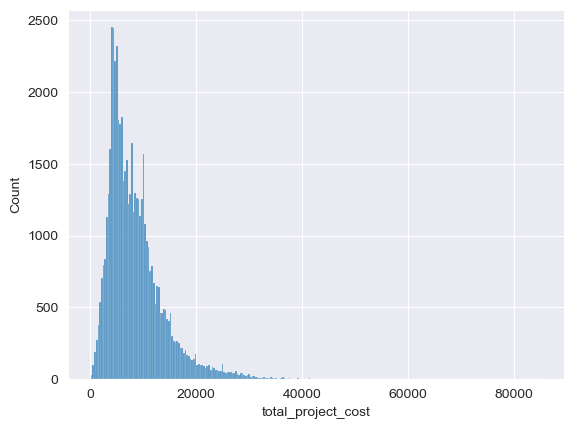

In [30]:
sns.histplot(df["total_project_cost"])

## Column 12: Total Incentives

In [31]:
df["total_incentives"].describe()

count    55808.000000
mean      1687.540209
std       1705.776690
min          0.000000
25%        301.750000
50%       1005.000000
75%       2900.000000
max      10000.000000
Name: total_incentives, dtype: float64

In [32]:
df["total_incentives"].median()

1005.0

In [33]:
(df["total_incentives"]==0).value_counts()

False    44682
True     11126
Name: total_incentives, dtype: int64

<AxesSubplot:xlabel='total_incentives', ylabel='Count'>

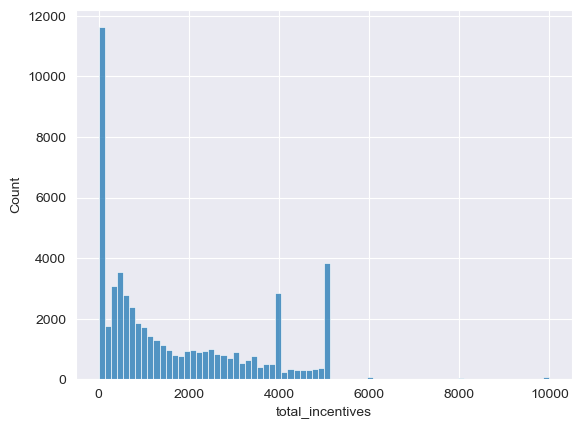

In [34]:
sns.histplot(df["total_incentives"])

## Column 13: Type of Program Financing

In [35]:
df["type_of_program_financing"].value_counts()

Green Jobs - Green NY Smart Energy Loan        14466
Green Jobs - Green NY On-Bill Recovery Loan     3689
ESMART                                           219
ESTAR                                             83
Name: type_of_program_financing, dtype: int64

In [36]:
df["type_of_program_financing"].isna().value_counts()

True     37351
False    18457
Name: type_of_program_financing, dtype: int64

## Column 14: Amount Financed Through Program

In [37]:
df["amount_financed_through_program"].describe()

count    55808.000000
mean      2805.132078
std       5084.448524
min          0.000000
25%          0.000000
50%          0.000000
75%       4307.000000
max      25000.000000
Name: amount_financed_through_program, dtype: float64

<AxesSubplot:xlabel='amount_financed_through_program', ylabel='Count'>

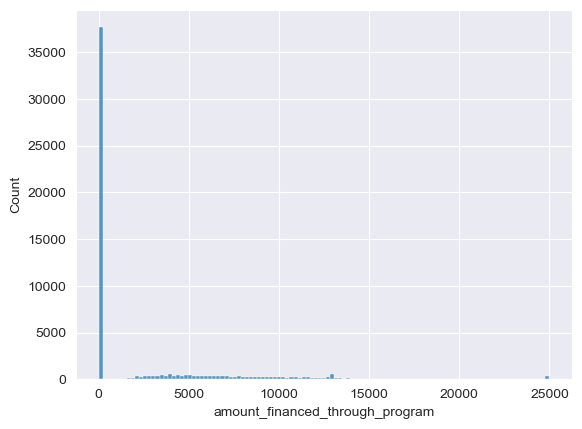

In [38]:
sns.histplot(df["amount_financed_through_program"])

In [39]:
# add a column describing whether project got financed by Green Jobs Green NY
df["financed?"] = df["amount_financed_through_program"].apply(lambda x: True if x != 0 else False)

In [40]:
# move next to amount financed columns
financed = df.pop("financed?")
df.insert(14, "financed", financed)

<AxesSubplot:xlabel='amount_financed_through_program', ylabel='Count'>

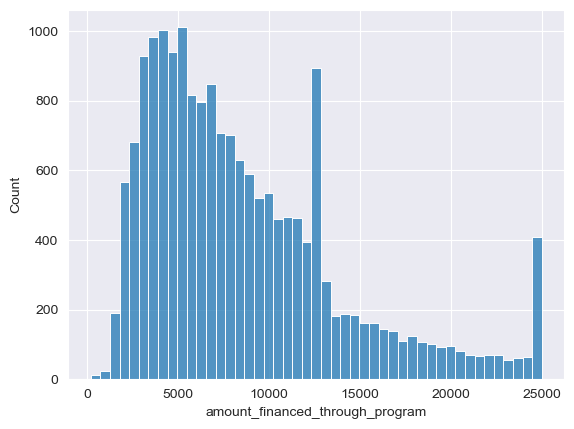

In [41]:
# histogram of all non-zero values in amount_financed_through_program
sns.histplot(df["amount_financed_through_program"].loc[df["amount_financed_through_program"] != 0])

## Column 15: Pre-Retrofit Home Heating Fuel Type

In [42]:
#Application of unity_column_entries function
translator = {"Natural Gas" : "Natural Gas",
             "Oil": "Oil",
             "Natural gas": "Natural Gas",
             "Propane": "Propane",
             "Electricity": "Electricity",
             "Wood": "Wood",
             "Kerosene": "Kerosene",
             "Coal": "Coal",
             "Bituminous Coal": "Bituminous Coal",
             "Anthracite Coal": "Anthracite Coal",
             "Electric": "Electricity"}

unify_column_entries(df, translator, "pre-retrofit_home_heating_fuel_type")

,home_performance_project_id,home_performance_site_id,project_county,project_city,project_zip,gas_utility_provider,electric_utility_provider,project_completion_date,customer_type,job_type,...,estimated_annual_water_heating_mmbtu_savings,first_year_energy_savings_$_estimate,homeowner_received_free/reduced_cost_audit?,location,new_york_zip_codes,counties_2,nys_municipal_boundaries_2,starting_year,current_year,year
0,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16,Assisted,Home Performance,...,27,474,Y,"{'type': 'Point', 'coordinates': [-75.16936, 4...",764.0,625.0,985,2010,2021,2021
1,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06,Assisted,Home Performance,...,3,111,Y,"{'type': 'Point', 'coordinates': [-77.218837, ...",364.0,631.0,631,2010,2021,2021
2,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15,Assisted,Home Performance,...,8,61,Y,"{'type': 'Point', 'coordinates': [-78.808435, ...",71.0,2041.0,300,2010,2021,2020
3,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09,Assisted,Home Performance,...,28,681,Y,"{'type': 'Point', 'coordinates': [-75.454665, ...",1366.0,625.0,989,2010,2021,2020
4,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08,Assisted,Home Performance,...,6,146,Y,"{'type': 'Point', 'coordinates': [-77.603561, ...",312.0,2091.0,742,2010,2021,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55825,P00000721450,S00000124921,Erie,Depew,14043,National Fuel Gas Distribution,New York State Electric & Gas,2010-11-15,Market,Home Performance,...,24,340,N,"{'type': 'Point', 'coordinates': [-78.702553, ...",506.0,2041.0,298,2010,2021,2010
55826,P00000727276,S00000130155,Schenectady,Schenectady,12303,National Grid,National Grid,2011-01-28,Assisted,Home Performance,...,33,823,N,"{'type': 'Point', 'coordinates': [-73.932117, ...",72.0,2030.0,832,2010,2021,2011
55827,P00000726343,S00000129326,Tompkins,Freeville,13068,New York State Electric & Gas,New York State Electric & Gas,2011-01-13,Market,Home Performance,...,16,887,N,"{'type': 'Point', 'coordinates': [-76.359264, ...",622.0,2181.0,712,2010,2021,2011
55828,P00000727199,S00000130090,Monroe,Rochester,14617,Rochester Gas & Electric,Rochester Gas & Electric,2010-12-26,Market,Home Performance,...,11,258,N,"{'type': 'Point', 'coordinates': [-77.597999, ...",1676.0,2093.0,545,2010,2021,2010


In [43]:
df["pre-retrofit_home_heating_fuel_type"].value_counts()

Natural Gas        38290
Oil                12539
Propane             2931
Electricity          895
Wood                 421
Wood Pellets         165
Kerosene             117
Coal                  48
Bituminous Coal        5
Anthracite Coal        5
Name: pre-retrofit_home_heating_fuel_type, dtype: int64

## Column 16: Year Home Built

In [44]:
df[df["year_home_built"].isna()].shape

(16869, 32)

<AxesSubplot:xlabel='year_home_built', ylabel='Count'>

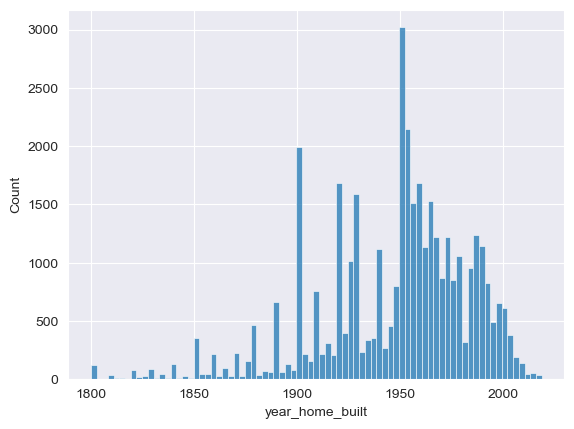

In [45]:
import seaborn as sns
sns.histplot(df["year_home_built"])

## Column 17: Size of Home

In [46]:
df[df["size_of_home"].isna()].shape

(8200, 32)

In [47]:
df["size_of_home"].describe()

count    47608.000000
mean      1911.702004
std        682.837560
min        800.000000
25%       1396.000000
50%       1800.000000
75%       2309.250000
max       4000.000000
Name: size_of_home, dtype: float64

In [48]:
df["size_of_home"] = df["size_of_home"]*0.0929

In [49]:
df["size_of_home"].value_counts()

111.4800    459
167.2200    400
133.7760    341
185.8000    335
148.6400    332
           ... 
336.1122      1
87.9763       1
311.6795      1
371.0426      1
242.5619      1
Name: size_of_home, Length: 2998, dtype: int64

In [50]:
df["size_of_home"].describe()

count    47608.000000
mean       177.597116
std         63.435609
min         74.320000
25%        129.688400
50%        167.220000
75%        214.529325
max        371.600000
Name: size_of_home, dtype: float64

## Column 18: Volume of Home

In [51]:
df[df["volume_of_home"].isna()].shape

(8200, 32)

In [52]:
df["volume_of_home"].describe()

count    47608.000000
mean     16269.150542
std       6381.620349
min       1111.000000
25%      11544.000000
50%      15112.000000
75%      19682.250000
max      70376.000000
Name: volume_of_home, dtype: float64

In [53]:
df["volume_of_home"] = df["volume_of_home"]*0.02832

In [54]:
df["volume_of_home"].value_counts()

271.87200    309
407.80800    252
326.24640    219
217.49760    185
453.12000    180
            ... 
906.55152      1
865.28928      1
321.77184      1
261.64848      1
718.90320      1
Name: volume_of_home, Length: 11057, dtype: int64

## Column 19: Number of Units

In [55]:
df[df["number_of_units"].isna()].shape

(16854, 32)

In [56]:
df[df["number_of_units"] == 0].shape

(0, 32)

In [57]:
df["number_of_units"].describe()

count    38954.000000
mean         1.035529
std          0.228219
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: number_of_units, dtype: float64

In [58]:
df["number_of_units"].value_counts()

1.0    37837
2.0      930
3.0      107
4.0       80
Name: number_of_units, dtype: int64

## Column 20: Measure Type

In [59]:
df[df["measure_type"].isna()].shape

(0, 32)

In [60]:
df["measure_type"].describe()

count              55808
unique                 3
top       Building Shell
freq               55277
Name: measure_type, dtype: object

In [61]:
df["measure_type"].value_counts()

Building Shell         55277
Heating and Cooling      525
Water Heater               6
Name: measure_type, dtype: int64

## Column 21: Estimated Annual kWh Savings

In [62]:
df[df["estimated_annual_electricity_kwh_savings"].isna()].shape

(0, 32)

In [63]:
df[df["estimated_annual_electricity_kwh_savings"] == 0].shape

(23234, 32)

In [64]:
df["estimated_annual_electricity_kwh_savings"].describe()

count    55808.000000
mean       363.587694
std       1691.379954
min     -27585.000000
25%          0.000000
50%          4.000000
75%        313.000000
max      63480.000000
Name: estimated_annual_electricity_kwh_savings, dtype: float64

## Column 22: Estimated Annual MMBtu Savings

In [65]:
# convert MMBtU to Kwh
df["estimated_annual_water_heating_kwh_savings"] = (df["estimated_annual_water_heating_mmbtu_savings"] * 293.29722222222).round(0)

In [66]:
# move next to amount financed columns
water_heating = df.pop("estimated_annual_water_heating_kwh_savings")
df.insert(22, "estimated_annual_water_heating_kwh_savings", water_heating)

In [67]:
df

,home_performance_project_id,home_performance_site_id,project_county,project_city,project_zip,gas_utility_provider,electric_utility_provider,project_completion_date,customer_type,job_type,...,estimated_annual_water_heating_mmbtu_savings,first_year_energy_savings_$_estimate,homeowner_received_free/reduced_cost_audit?,location,new_york_zip_codes,counties_2,nys_municipal_boundaries_2,starting_year,current_year,year
0,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16,Assisted,Home Performance,...,27,474,Y,"{'type': 'Point', 'coordinates': [-75.16936, 4...",764.0,625.0,985,2010,2021,2021
1,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06,Assisted,Home Performance,...,3,111,Y,"{'type': 'Point', 'coordinates': [-77.218837, ...",364.0,631.0,631,2010,2021,2021
2,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15,Assisted,Home Performance,...,8,61,Y,"{'type': 'Point', 'coordinates': [-78.808435, ...",71.0,2041.0,300,2010,2021,2020
3,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09,Assisted,Home Performance,...,28,681,Y,"{'type': 'Point', 'coordinates': [-75.454665, ...",1366.0,625.0,989,2010,2021,2020
4,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08,Assisted,Home Performance,...,6,146,Y,"{'type': 'Point', 'coordinates': [-77.603561, ...",312.0,2091.0,742,2010,2021,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55825,P00000721450,S00000124921,Erie,Depew,14043,National Fuel Gas Distribution,New York State Electric & Gas,2010-11-15,Market,Home Performance,...,24,340,N,"{'type': 'Point', 'coordinates': [-78.702553, ...",506.0,2041.0,298,2010,2021,2010
55826,P00000727276,S00000130155,Schenectady,Schenectady,12303,National Grid,National Grid,2011-01-28,Assisted,Home Performance,...,33,823,N,"{'type': 'Point', 'coordinates': [-73.932117, ...",72.0,2030.0,832,2010,2021,2011
55827,P00000726343,S00000129326,Tompkins,Freeville,13068,New York State Electric & Gas,New York State Electric & Gas,2011-01-13,Market,Home Performance,...,16,887,N,"{'type': 'Point', 'coordinates': [-76.359264, ...",622.0,2181.0,712,2010,2021,2011
55828,P00000727199,S00000130090,Monroe,Rochester,14617,Rochester Gas & Electric,Rochester Gas & Electric,2010-12-26,Market,Home Performance,...,11,258,N,"{'type': 'Point', 'coordinates': [-77.597999, ...",1676.0,2093.0,545,2010,2021,2010


In [68]:
df[df["estimated_annual_water_heating_mmbtu_savings"].isna()].shape

(0, 33)

In [69]:
df[df["estimated_annual_water_heating_mmbtu_savings"] == 0].shape

(2909, 33)

In [70]:
df["estimated_annual_water_heating_mmbtu_savings"].describe()

count    55808.000000
mean        28.625018
std         26.471955
min       -214.000000
25%         11.000000
50%         22.000000
75%         39.000000
max        445.000000
Name: estimated_annual_water_heating_mmbtu_savings, dtype: float64

<AxesSubplot:xlabel='estimated_annual_water_heating_mmbtu_savings', ylabel='Count'>

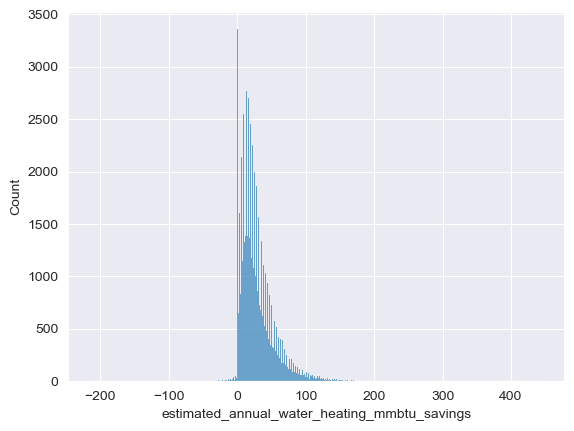

In [71]:
sns.histplot(df["estimated_annual_water_heating_mmbtu_savings"])

## Column 23: First Year Energy Savings $ Estimate

In [72]:
df[df["first_year_energy_savings_$_estimate"].isna()].shape

(0, 33)

In [73]:
df[df["first_year_energy_savings_$_estimate"] == 0].shape

(105, 33)

In [74]:
df["first_year_energy_savings_$_estimate"].describe()

count    55808.000000
mean       596.246058
std        683.593765
min          0.000000
25%        160.000000
50%        352.000000
75%        763.000000
max       5981.000000
Name: first_year_energy_savings_$_estimate, dtype: float64

<AxesSubplot:xlabel='first_year_energy_savings_$_estimate', ylabel='Count'>

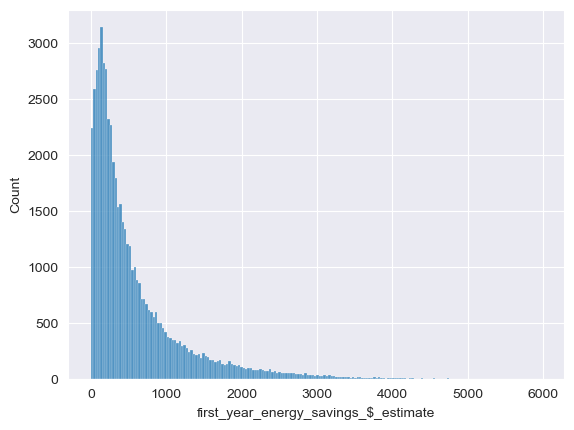

In [75]:
sns.histplot(df["first_year_energy_savings_$_estimate"])

In [76]:
df

,home_performance_project_id,home_performance_site_id,project_county,project_city,project_zip,gas_utility_provider,electric_utility_provider,project_completion_date,customer_type,job_type,...,estimated_annual_water_heating_mmbtu_savings,first_year_energy_savings_$_estimate,homeowner_received_free/reduced_cost_audit?,location,new_york_zip_codes,counties_2,nys_municipal_boundaries_2,starting_year,current_year,year
0,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16,Assisted,Home Performance,...,27,474,Y,"{'type': 'Point', 'coordinates': [-75.16936, 4...",764.0,625.0,985,2010,2021,2021
1,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06,Assisted,Home Performance,...,3,111,Y,"{'type': 'Point', 'coordinates': [-77.218837, ...",364.0,631.0,631,2010,2021,2021
2,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15,Assisted,Home Performance,...,8,61,Y,"{'type': 'Point', 'coordinates': [-78.808435, ...",71.0,2041.0,300,2010,2021,2020
3,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09,Assisted,Home Performance,...,28,681,Y,"{'type': 'Point', 'coordinates': [-75.454665, ...",1366.0,625.0,989,2010,2021,2020
4,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08,Assisted,Home Performance,...,6,146,Y,"{'type': 'Point', 'coordinates': [-77.603561, ...",312.0,2091.0,742,2010,2021,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55825,P00000721450,S00000124921,Erie,Depew,14043,National Fuel Gas Distribution,New York State Electric & Gas,2010-11-15,Market,Home Performance,...,24,340,N,"{'type': 'Point', 'coordinates': [-78.702553, ...",506.0,2041.0,298,2010,2021,2010
55826,P00000727276,S00000130155,Schenectady,Schenectady,12303,National Grid,National Grid,2011-01-28,Assisted,Home Performance,...,33,823,N,"{'type': 'Point', 'coordinates': [-73.932117, ...",72.0,2030.0,832,2010,2021,2011
55827,P00000726343,S00000129326,Tompkins,Freeville,13068,New York State Electric & Gas,New York State Electric & Gas,2011-01-13,Market,Home Performance,...,16,887,N,"{'type': 'Point', 'coordinates': [-76.359264, ...",622.0,2181.0,712,2010,2021,2011
55828,P00000727199,S00000130090,Monroe,Rochester,14617,Rochester Gas & Electric,Rochester Gas & Electric,2010-12-26,Market,Home Performance,...,11,258,N,"{'type': 'Point', 'coordinates': [-77.597999, ...",1676.0,2093.0,545,2010,2021,2010


## Column 24: Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)

In [77]:
df[df["homeowner_received_free/reduced_cost_audit?"].isna()].shape

(0, 33)

In [78]:
df[df["homeowner_received_free/reduced_cost_audit?"] == 0].shape

(0, 33)

In [79]:
df["homeowner_received_free/reduced_cost_audit?"].value_counts()

Y    47444
N     8364
Name: homeowner_received_free/reduced_cost_audit?, dtype: int64

In [80]:
clm24_translator = {"Y": True, "N": False}

In [81]:
unify_column_entries(df, clm24_translator, "homeowner_received_free/reduced_cost_audit?")

,home_performance_project_id,home_performance_site_id,project_county,project_city,project_zip,gas_utility_provider,electric_utility_provider,project_completion_date,customer_type,job_type,...,estimated_annual_water_heating_mmbtu_savings,first_year_energy_savings_$_estimate,homeowner_received_free/reduced_cost_audit?,location,new_york_zip_codes,counties_2,nys_municipal_boundaries_2,starting_year,current_year,year
0,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16,Assisted,Home Performance,...,27,474,True,"{'type': 'Point', 'coordinates': [-75.16936, 4...",764.0,625.0,985,2010,2021,2021
1,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06,Assisted,Home Performance,...,3,111,True,"{'type': 'Point', 'coordinates': [-77.218837, ...",364.0,631.0,631,2010,2021,2021
2,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15,Assisted,Home Performance,...,8,61,True,"{'type': 'Point', 'coordinates': [-78.808435, ...",71.0,2041.0,300,2010,2021,2020
3,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09,Assisted,Home Performance,...,28,681,True,"{'type': 'Point', 'coordinates': [-75.454665, ...",1366.0,625.0,989,2010,2021,2020
4,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08,Assisted,Home Performance,...,6,146,True,"{'type': 'Point', 'coordinates': [-77.603561, ...",312.0,2091.0,742,2010,2021,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55825,P00000721450,S00000124921,Erie,Depew,14043,National Fuel Gas Distribution,New York State Electric & Gas,2010-11-15,Market,Home Performance,...,24,340,False,"{'type': 'Point', 'coordinates': [-78.702553, ...",506.0,2041.0,298,2010,2021,2010
55826,P00000727276,S00000130155,Schenectady,Schenectady,12303,National Grid,National Grid,2011-01-28,Assisted,Home Performance,...,33,823,False,"{'type': 'Point', 'coordinates': [-73.932117, ...",72.0,2030.0,832,2010,2021,2011
55827,P00000726343,S00000129326,Tompkins,Freeville,13068,New York State Electric & Gas,New York State Electric & Gas,2011-01-13,Market,Home Performance,...,16,887,False,"{'type': 'Point', 'coordinates': [-76.359264, ...",622.0,2181.0,712,2010,2021,2011
55828,P00000727199,S00000130090,Monroe,Rochester,14617,Rochester Gas & Electric,Rochester Gas & Electric,2010-12-26,Market,Home Performance,...,11,258,False,"{'type': 'Point', 'coordinates': [-77.597999, ...",1676.0,2093.0,545,2010,2021,2010


## Column 25: New Georeferenced Column

**google says "latitude and longitude" --> change order**

In [82]:
import ast

df["latitude"] = df["location"].apply(lambda x: ast.literal_eval(x)["coordinates"][1])
df["longitude"] = df["location"].apply(lambda x: ast.literal_eval(x)["coordinates"][0])
df.drop(["location"], axis=1, inplace=True)

## Columns 26 - 28: Remove columns

In [83]:
df.drop(["new_york_zip_codes", "counties_2", "nys_municipal_boundaries_2"], axis=1, inplace=True)

## Final dataframe

In [84]:
df["savings_sum"] = df["estimated_annual_electricity_kwh_savings"] + df["estimated_annual_water_heating_kwh_savings"]

In [85]:
df[df["estimated_annual_electricity_kwh_savings"] == 0].index

Int64Index([    0,     2,     3,     4,     7,     9,    10,    11,    12,
               13,
            ...
            55804, 55807, 55810, 55814, 55820, 55823, 55825, 55826, 55827,
            55829],
           dtype='int64', length=23234)

In [86]:
df["water_heating_price"] = df[df["estimated_annual_electricity_kwh_savings"] == 0]["first_year_energy_savings_$_estimate"]/df[df["estimated_annual_electricity_kwh_savings"] == 0]["estimated_annual_water_heating_kwh_savings"]

In [87]:
df["electricity_price"] = df[df["estimated_annual_water_heating_kwh_savings"] == 0]["first_year_energy_savings_$_estimate"]/df[df["estimated_annual_water_heating_kwh_savings"] == 0]["estimated_annual_electricity_kwh_savings"]

In [88]:
df[df["electricity_price"] < 0] = 0

In [89]:
# set water heating price to zero where estimate is negative
df["water_heating_price"].describe()

count    2.313900e+04
mean              inf
std               NaN
min      0.000000e+00
25%      3.539912e-02
50%      5.049674e-02
75%      9.732791e-02
max               inf
Name: water_heating_price, dtype: float64

In [90]:
df["electricity_price"].describe()

count    2807.000000
mean             inf
std              NaN
min         0.000000
25%         0.100690
50%         0.110251
75%         0.141352
max              inf
Name: electricity_price, dtype: float64

## Create cumulative sums and save to .csv

In [95]:
df["years_since_completion"] = df["current_year"]-df["year"]

In [91]:
df["cumulative_sum_savings$"] = df["first_year_energy_savings_$_estimate"].cumsum()

In [97]:
df["cumulative_sum_costs"] = df["total_project_cost"].cumsum()

0        2021
1        2021
2        2020
3        2020
4        2020
         ... 
55825    2010
55826    2011
55827    2011
55828    2010
55829    2011
Name: year, Length: 55808, dtype: int64

In [98]:
df["savings_since_completion"] = df["years_since_completion"]*df["first_year_energy_savings_$_estimate"]

In [99]:
df["savings_since_completion"]

0           0
1           0
2          61
3         681
4         146
         ... 
55825    3740
55826    8230
55827    8870
55828    2838
55829      90
Name: savings_since_completion, Length: 55808, dtype: int64

In [100]:
df["first_year_energy_savings_$_estimate"]

0        474
1        111
2         61
3        681
4        146
        ... 
55825    340
55826    823
55827    887
55828    258
55829      9
Name: first_year_energy_savings_$_estimate, Length: 55808, dtype: int64

In [101]:
df["cumsum_savings_over_years"] = df["savings_since_completion"].cumsum()

In [103]:
df["cumsum_savings_over_years"].tail()

55825    218148108
55826    218156338
55827    218165208
55828    218168046
55829    218168136
Name: cumsum_savings_over_years, dtype: int64

In [104]:
df["cumulative_sum_costs"].tail()

55825    478419233
55826    478429035
55827    478435069
55828    478443523
55829    478456011
Name: cumulative_sum_costs, dtype: int64

In [105]:
df.to_csv("dataset_clean.csv")